# 1) Importação dos dados + bibliotecas

In [1]:
#aqui tem as bibliotecas que vamos utilizar

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

In [2]:
df = pd.read_csv('CC GENERAL.csv')

# 2) entendimento e limpeza da base

In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df.drop('CUST_ID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [13]:
display(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT' ]].describe(percentiles=[0.95]))
print('')
print(df['CREDIT_LIMIT'].min(), type(df['CREDIT_LIMIT'].min()))
print('')
print(df['MINIMUM_PAYMENTS'].min())

,MINIMUM_PAYMENTS,CREDIT_LIMIT
count,8637.000000,8949.000000
mean,864.206542,4494.449450
std,2372.446607,3638.815725
min,0.019163,50.000000
50%,312.343947,3000.000000
95%,2766.563310,12000.000000
max,76406.207520,30000.000000



50.0 <class 'float'>

0.019163


In [10]:
value = {'MINIMUM_PAYMENTS' : df['MINIMUM_PAYMENTS'].min() , 'CREDIT_LIMIT' : df['CREDIT_LIMIT'].min()}
df0 = df.fillna(value=value)
df0.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df0.shape

(8950, 17)

In [12]:
df0[['CREDIT_LIMIT']].describe(percentiles=[0.01, 0.25, 0.75, 0.95, 0.99])

,CREDIT_LIMIT
count,8950.000000
mean,4493.952864
std,3638.915681
min,50.000000
1%,500.000000
25%,1600.000000
50%,3000.000000
75%,6500.000000
95%,12000.000000
99%,17000.000000


In [32]:
df[('CREDIT_LIMIT')].quantile(.95)

12000.0

In [14]:
F = ['BALANCE',
     'PURCHASES',
     'MINIMUM_PAYMENTS', 
     'PAYMENTS', 
     'CREDIT_LIMIT',
     'PURCHASES_TRX',
     'ONEOFF_PURCHASES', 
     'CASH_ADVANCE',
     'CASH_ADVANCE_TRX']

In [24]:
df1 = df0[df0['BALANCE'] < df0['BALANCE'].quantile(.95)]

df1 = df1[df1['PURCHASES'] < df0['PURCHASES'].quantile(.95)]
df1 = df1[df1['MINIMUM_PAYMENTS'] < df0['MINIMUM_PAYMENTS'].quantile(.95)]
df1 = df1[df1['PAYMENTS'] < df0['PAYMENTS'].quantile(.95)]
df1 = df1[df1['CREDIT_LIMIT'] < df0['CREDIT_LIMIT'].quantile(.95)]
df1 = df1[df1['PURCHASES_TRX'] < df0['PURCHASES_TRX'].quantile(.95)]
df1 = df1[df1['ONEOFF_PURCHASES'] < df0['ONEOFF_PURCHASES'].quantile(.95)]
df1 = df1[df1['CASH_ADVANCE'] < df0['CASH_ADVANCE'].quantile(.95)]
df1 = df1[df1['CASH_ADVANCE_TRX'] < df0['CASH_ADVANCE_TRX'].quantile(.95)]

df1[['CREDIT_LIMIT']].describe(percentiles=[0.01, 0.25, 0.75, 0.95, 0.99])

,CREDIT_LIMIT
count,6880.000000
mean,3456.202556
std,2465.720075
min,50.000000
1%,500.000000
25%,1500.000000
50%,2700.000000
75%,5000.000000
95%,8500.000000
99%,10500.000000


# 3 ) Metodo da Silhouette

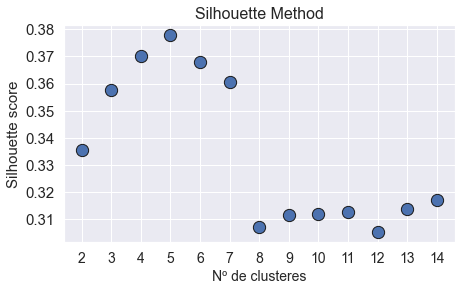

In [30]:
#Library Import 

from sklearn.preprocessing import normalize 
from sklearn import metrics 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 

# Normalize 
# Você deve montar o procedimento aqui _______________ _______________ _______________

alvo = normalize(df1) 
max = 15 
km_silhouette = [] 
km_scores = []
for i in range(2,max): 
    km = KMeans(n_clusters=i, random_state=0).fit(alvo) 
    preds = km.predict(alvo) 
    km_scores.append(-km.score(alvo)) 
    silhouette = silhouette_score(alvo,preds) 
    km_silhouette.append(silhouette) 
    
# Plotagem do método da Silhouette (Silhueta) 

plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16) 
plt.scatter(x=[i for i in range(2,max)],
            y=km_silhouette,s=150,edgecolor='k') 

plt.grid(True) 
plt.xlabel("Nº de clusteres",fontsize=14) 

plt.ylabel("Silhouette score",fontsize=15) 
plt.xticks([i for i in range(2,max)],fontsize=14) 
plt.yticks(fontsize=15) 
plt.show()

# 4) Aplicando o modelo de Gaussian Mixture

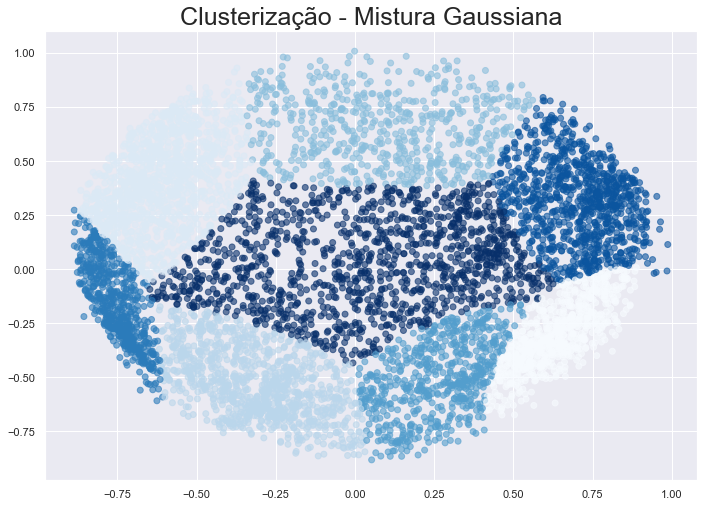

In [73]:
#Library Import
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.mixture import GaussianMixture 
from sklearn.decomposition import PCA

# Standardize data 
norm = StandardScaler()

df_norm = df1.copy()

for i in df_norm.columns:
    df_norm[i] = norm.fit_transform(df_norm[i].values.reshape(-1,1))

# Normalizing 
normalized_df = normalize(df_norm,axis=1) 

# PCA _____________ 
pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2'] 

# Plotagem da clusterização (em 2D) 
plt.title('Clusterização - Mistura Gaussiana',fontsize=25)

plt.scatter(X_principal['P1'], X_principal['P2'], c = GaussianMixture(n_components = 8).fit_predict(X_principal), alpha = 0.6,cmap='Blues') 

plt.show()

# 5) Modelo Kmeans

## 5.1) Metodo de elbow

In [113]:
import math
def calculate_wcss(data):
    wcss = []
    for n in range(2, 15):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss


def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 14, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        
    distances_df = pd.DataFrame(distances, columns=['A'])
    
    return distances_df[distances_df['A'] == distances_df.values.max()].index + 2

Text(0, 0.5, 'Inertia')

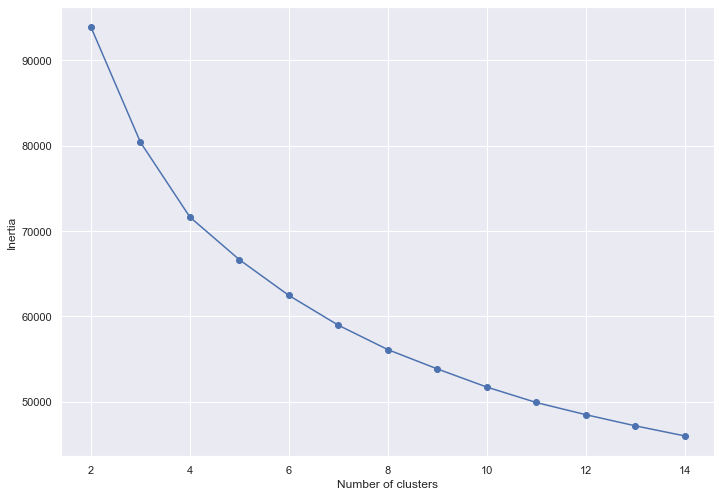

In [114]:
inercias = calculate_wcss(df_norm)
frame = pd.DataFrame({'Cluster':range(2,15) , 'SSE':inercias})
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [115]:
print(optimal_number_of_clusters(inercias))

Int64Index([6], dtype='int64')


## 5.2 ) Plot do Kmeans

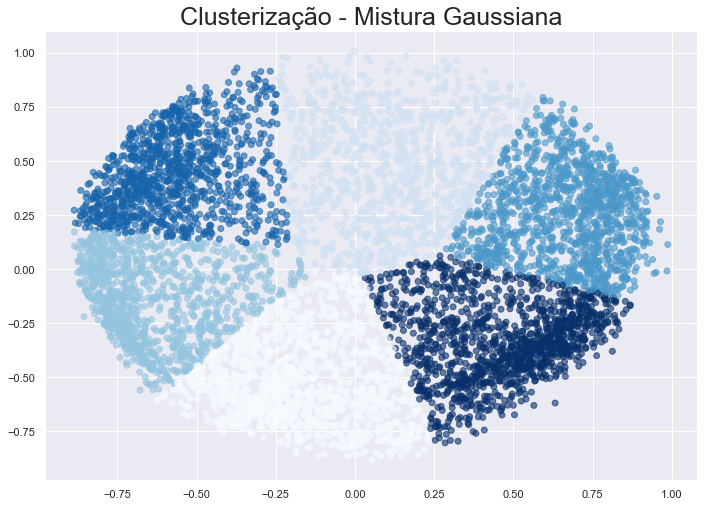

In [112]:

# Plotagem da clusterização (em 2D) 
plt.title('Clusterização - Mistura Gaussiana',fontsize=25)

plt.scatter(X_principal['P1'], X_principal['P2'], c = KMeans(6).fit_predict(X_principal), alpha = 0.6,cmap='Blues') 

plt.show()

# 6) Criando Cluster com o GaussianMixture

In [116]:
GM = GaussianMixture(8)
GM.fit(df_norm)

GaussianMixture(n_components=8)

In [118]:
labels = GM.fit_predict(df_norm)
df1['cluster'] = labels
df1['cluster'] = df1['cluster'].astype('str')

In [123]:
df1['cluster'].value_counts().sort_index()

0    1521
1    1071
2     865
3      17
4    1405
5    1241
6     340
7     420
Name: cluster, dtype: int64

In [125]:
df1.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.0,1.000000,1.0,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,4


In [143]:
df_norm['cluster'] = labels
df_norm['cluster'] = df_norm['cluster'].astype('str')
df_norm.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.801300,-0.156791,-0.671245,-0.580259,-0.406649,-0.554374,-0.772000,-0.624223,-0.680848,-0.654668,-0.608844,-0.686175,-0.996212,-0.792934,-0.611863,-0.528461,0.378142,5
2,1.259571,0.563133,0.268683,0.913521,-0.617526,-0.554374,1.354168,3.205472,-0.896459,-0.654668,-0.608844,0.199112,1.640126,-0.361755,0.487861,-0.528461,0.378142,4


# 7) Fazendo a regressão - Neural Network

In [169]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [171]:
X = df_norm.drop('CREDIT_LIMIT', axis=1)
y = df1[['CREDIT_LIMIT']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=33)

print(X_train.shape)
print(X_test.shape)
print('')
print(y_train.shape)
print(y_test.shape)

(5504, 17)
(1376, 17)

(5504, 1)
(1376, 1)


In [172]:
MLP = MLPRegressor(random_state=33, max_iter=1000)
MLP.fit(X_train, y_train)
y_pred_teste_2 = MLP.predict(X_test)
y_pred_treino_2 = MLP.predict(X_train)

V:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
V:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [181]:
print('')
print('MAE teste: %.2f'% mean_absolute_error(y_test, y_pred_teste_2))
print('RMSE teste: %.2f'% mean_squared_error(y_test, y_pred_teste_2))
print('R2 teste: %.2f'% r2_score(y_test, y_pred_teste_2))
print('')
print('MAE treino: %.2f'% mean_absolute_error(y_train, y_pred_treino_2))
print('RMSE treino: %.2f'% mean_squared_error(y_train, y_pred_treino_2))
print('R2 treino: %.2f'% r2_score(y_train, y_pred_treino_2))
print('')




MAE teste: 1508.17
RMSE teste: 4255587.62
R2 teste: 0.33

MAE treino: 1477.36
RMSE treino: 3891780.68
R2 treino: 0.35



In [180]:
mean_absolute_error(y_test, y_pred_teste_2) / df1[['CREDIT_LIMIT']].describe().T['std'] 

CREDIT_LIMIT    0.611654
Name: std, dtype: float64